In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import json
from pprint import pprint
import os
# os.chdir("/home/zhuoyan/nlp/jiajun-icl")
os.chdir("/home/ubuntu/projects/jiajun-icl")

# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)
    
def read_plot_data(model):
    data = load_json(f"./result/{task}/{model}/accs.json")
    print(len(data))
    df_allseeds = pd.DataFrame(data)
    df_allseeds.head(0)
    # Select rows where random_mask_head is False
    df_not_random_mask_head = df_allseeds[(df_allseeds['random_mask_head'] == False) | (df_allseeds['mask_head'] == 0)]
    df_not_random_mask_head.head(0)
    sns.set_theme(style="darkgrid")
    # Create a figure and subplots
    fig, axes = plt.subplots(5, 2, figsize=(12, 30), sharey=True)

    for i, seed in enumerate([37,42,134,1567,8787]):
        df_seed = df_allseeds[df_allseeds['random_mask_head_seed'] == seed]
        df = pd.concat([df_not_random_mask_head, df_seed])
        for j, setting in enumerate(df['setting'].unique()):
            data = df[df['setting'] == setting]
            ax = axes[i, j]
            sns.lineplot(data=data, x='mask_head', y='acc', hue='random_mask_head', ax=axes[i,j])
            sns.scatterplot(data=data, x='mask_head', y='acc', hue='random_mask_head', ax=axes[i,j], marker='o', s=50)
            ax.set_title(f'Accuracy vs. Mask heads - {setting} - seed{seed}')
            ax.set_xlabel('Mask Head')
            ax.set_ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

task = "ioi"

64


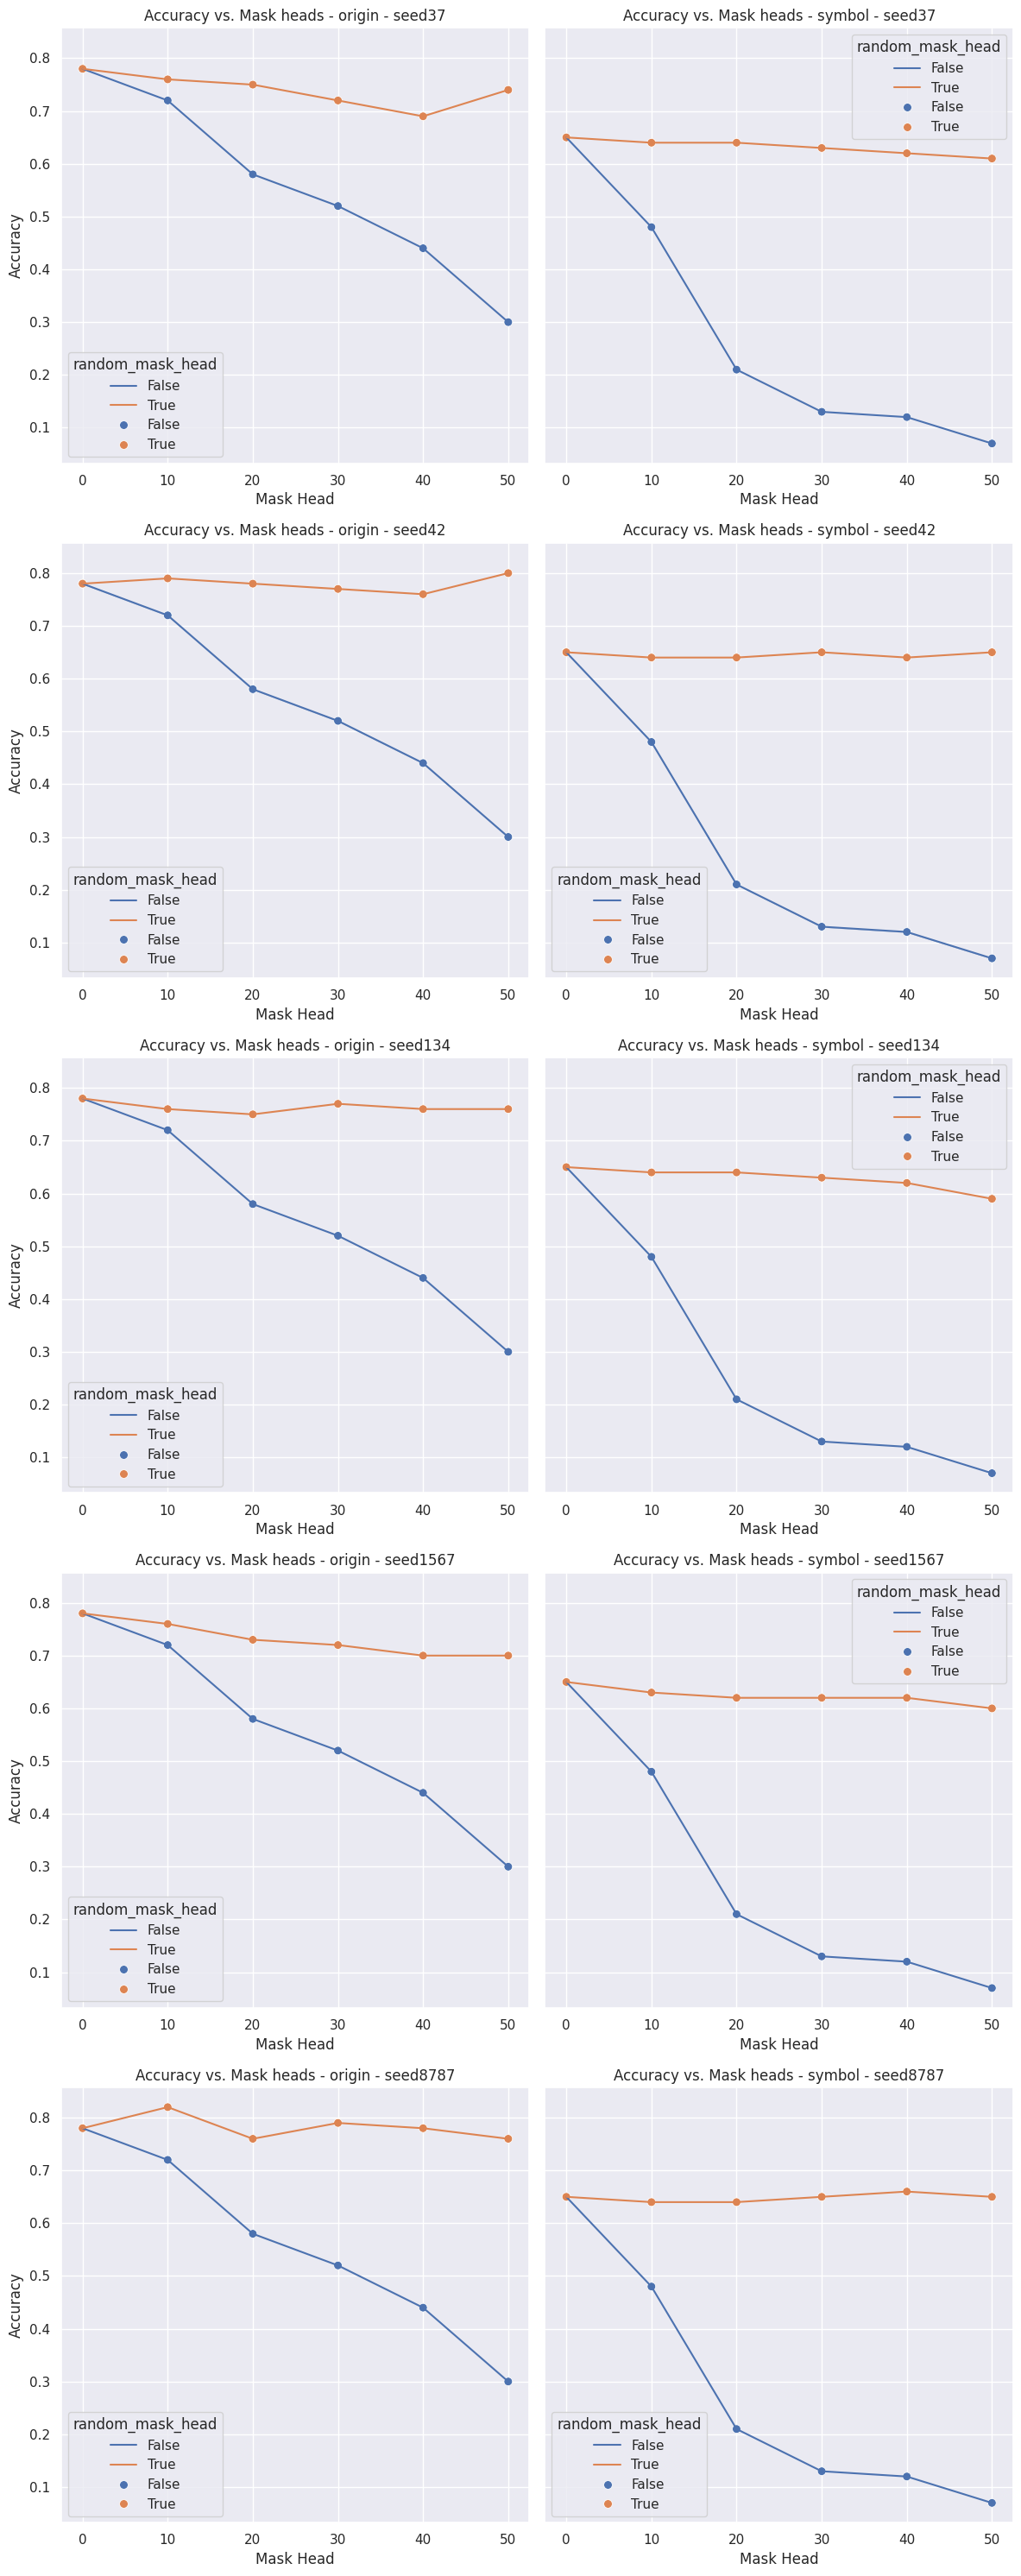

In [3]:
read_plot_data("falcon_7b")


64


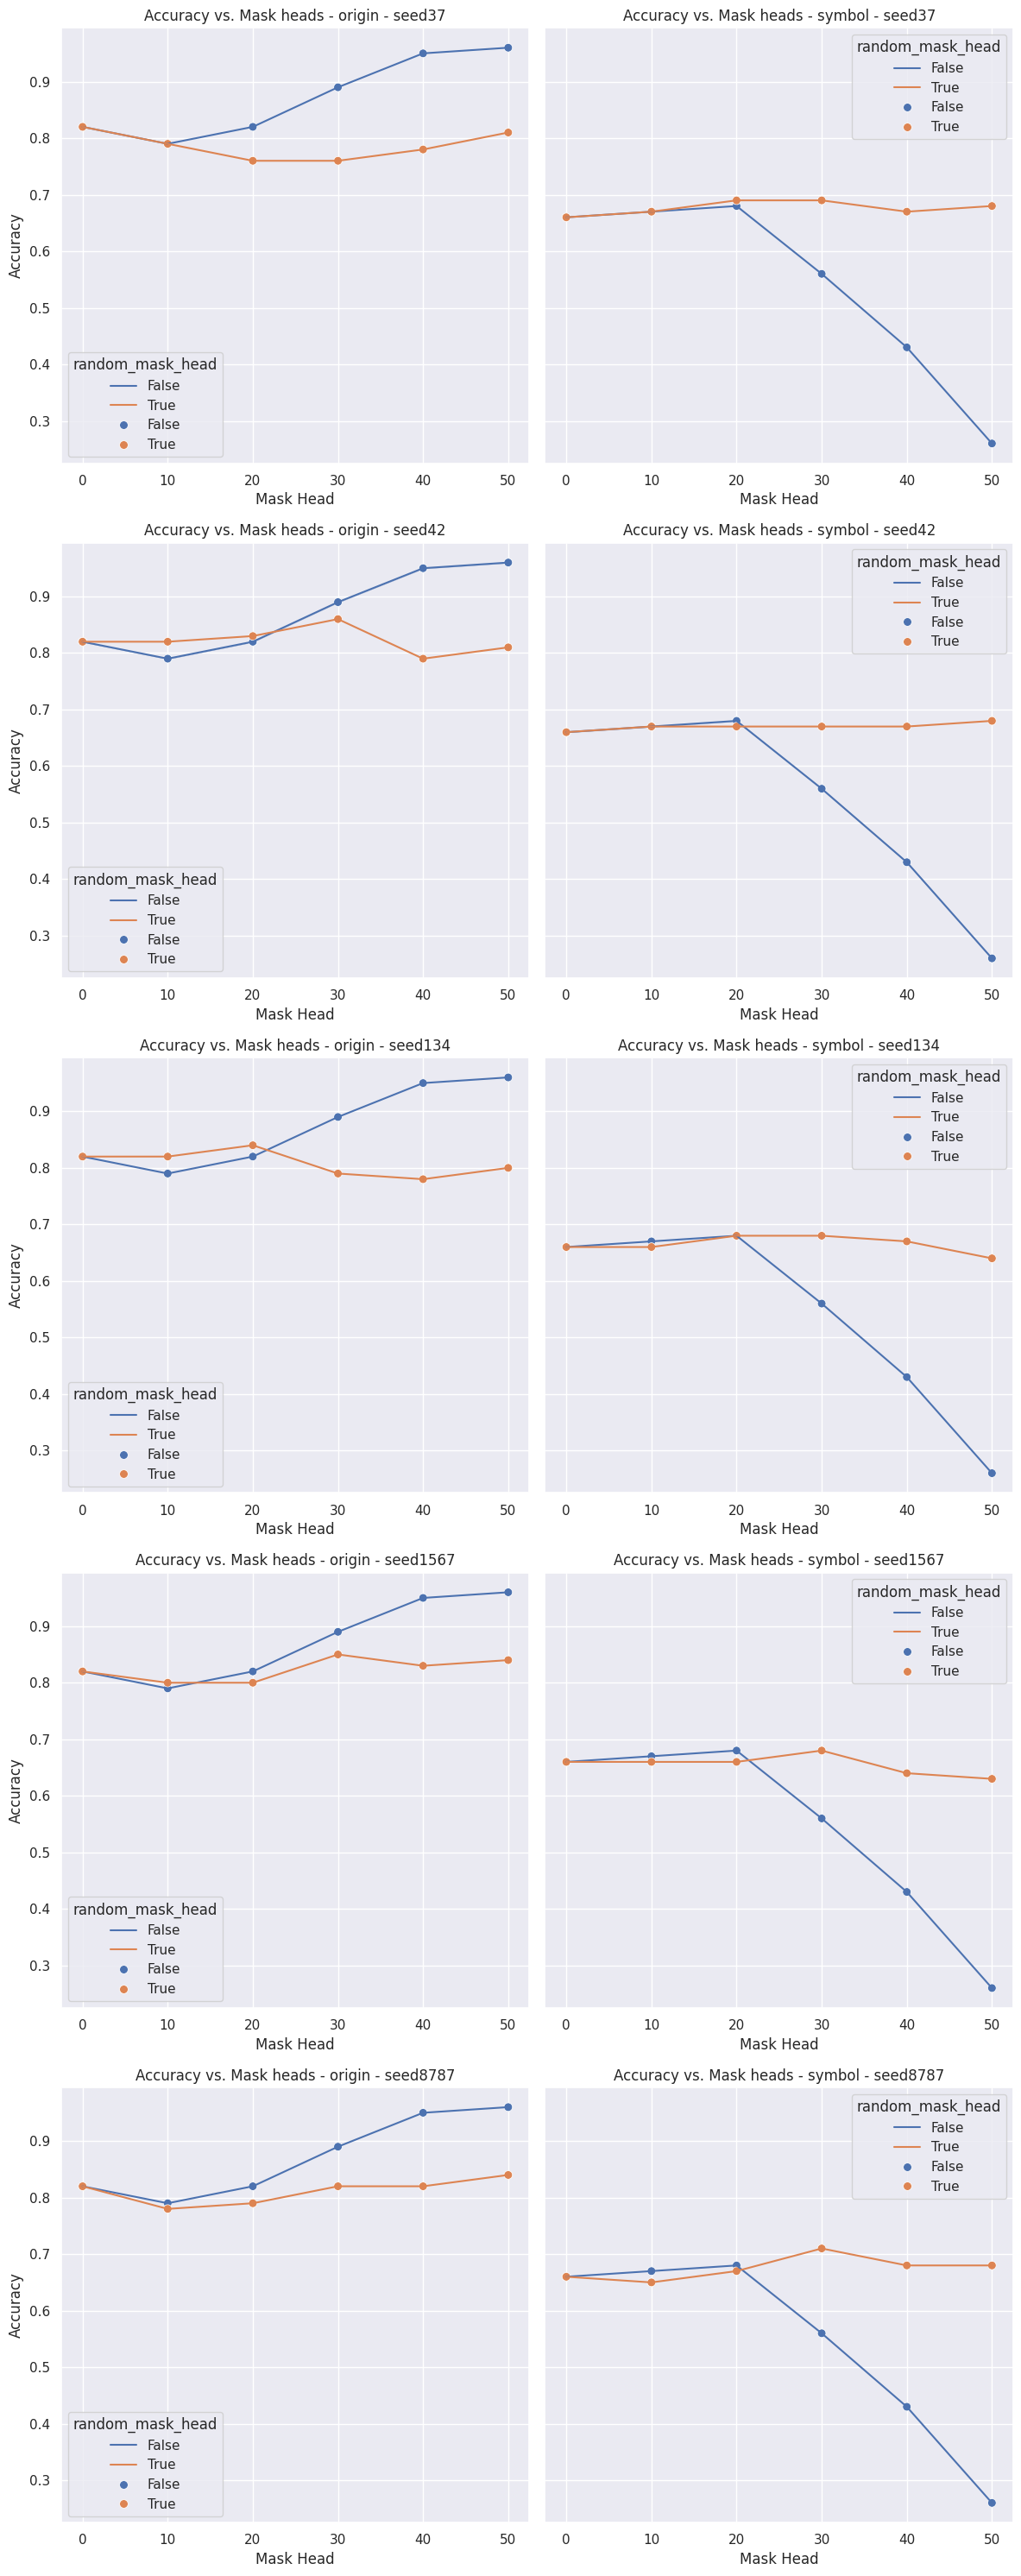

In [4]:
read_plot_data("falcon2_11b")


64


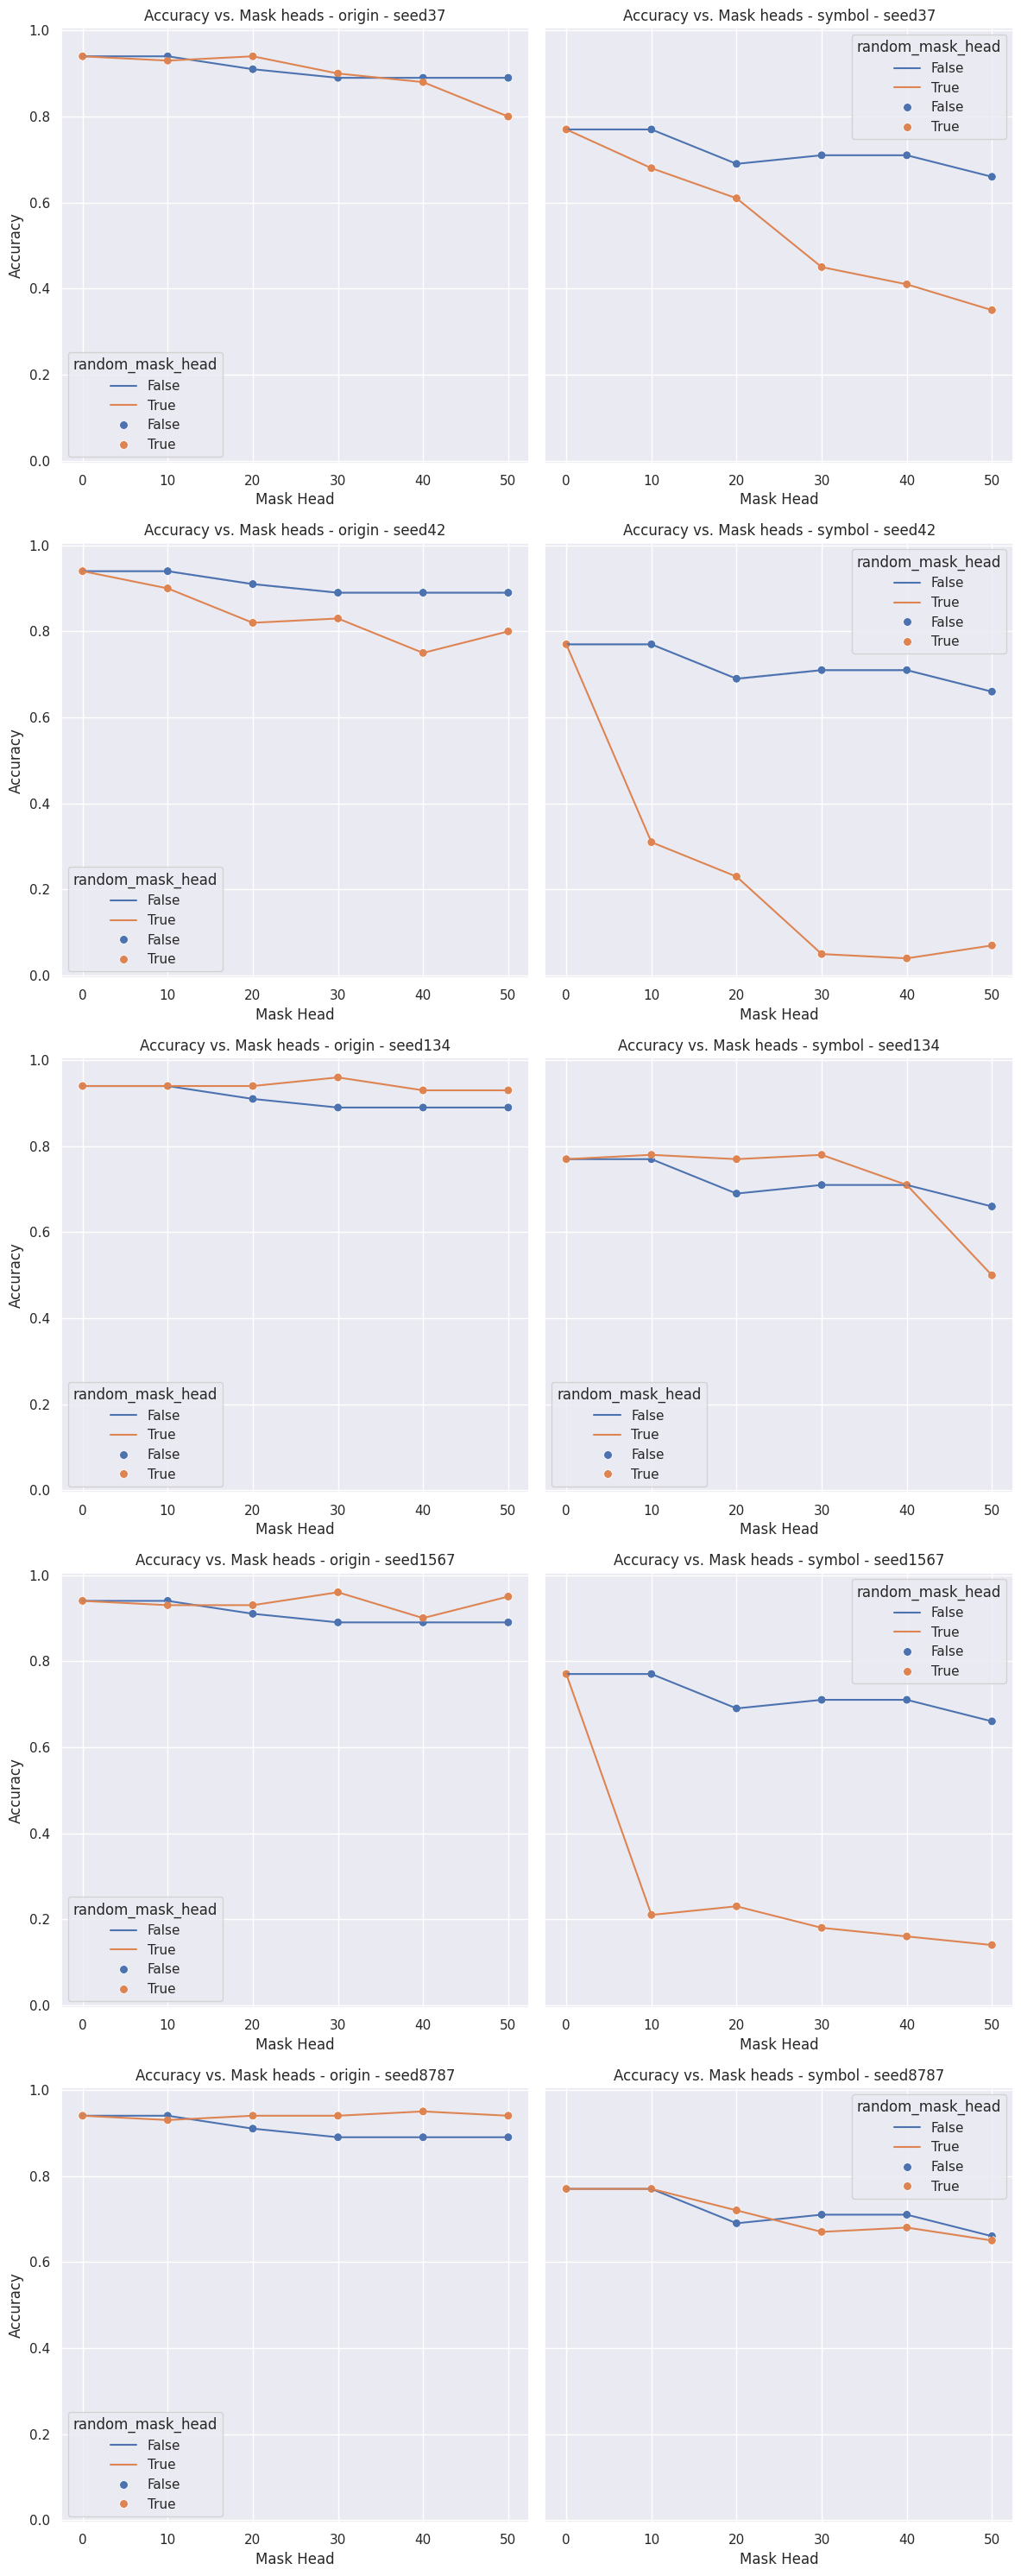

In [5]:
read_plot_data("gemma_7b_it")


64


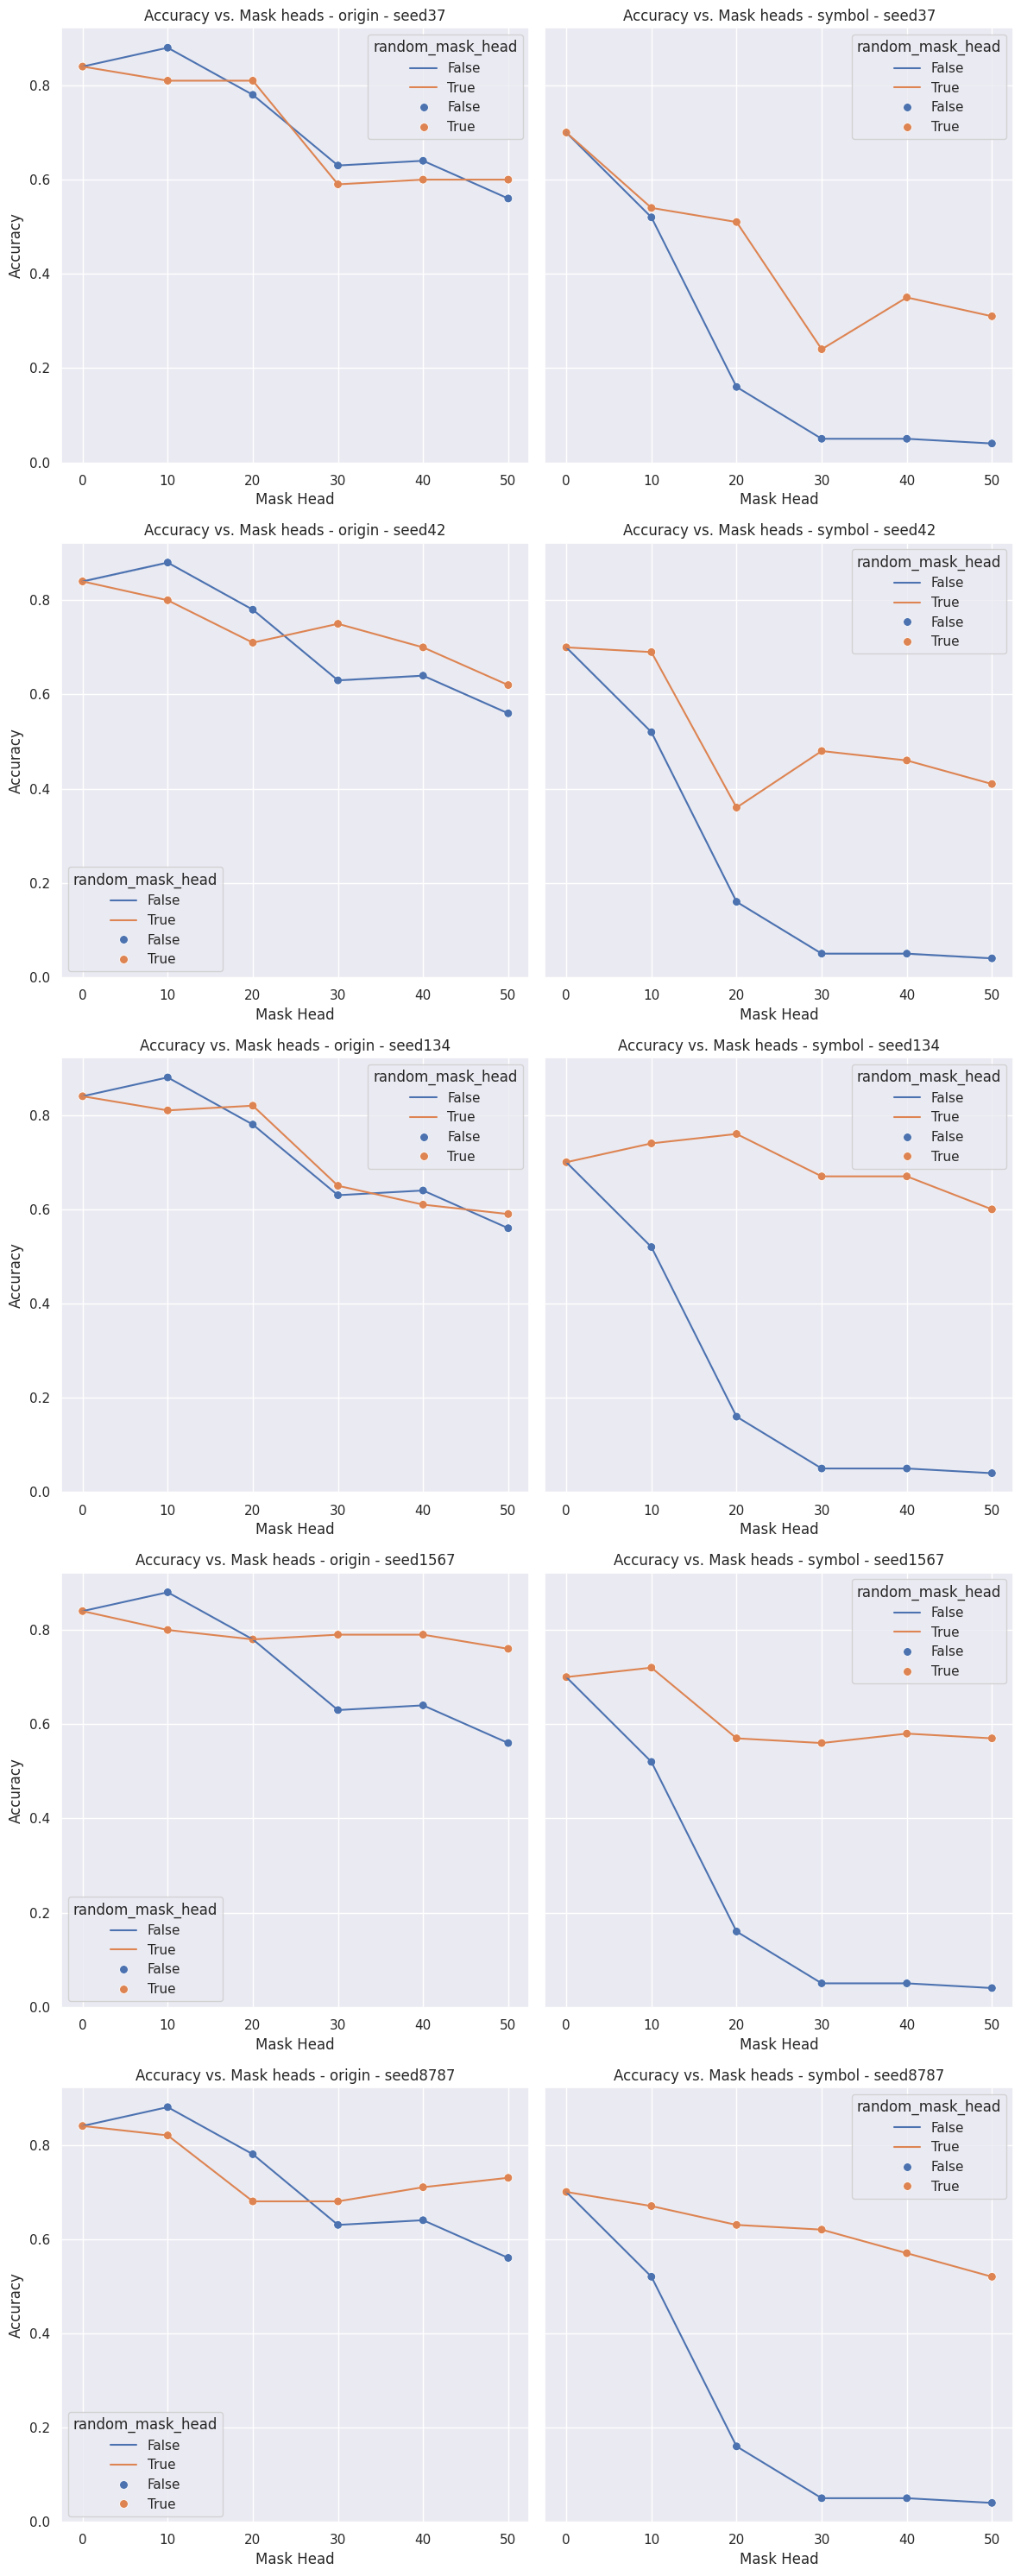

In [6]:
read_plot_data("llama2_7b")

64


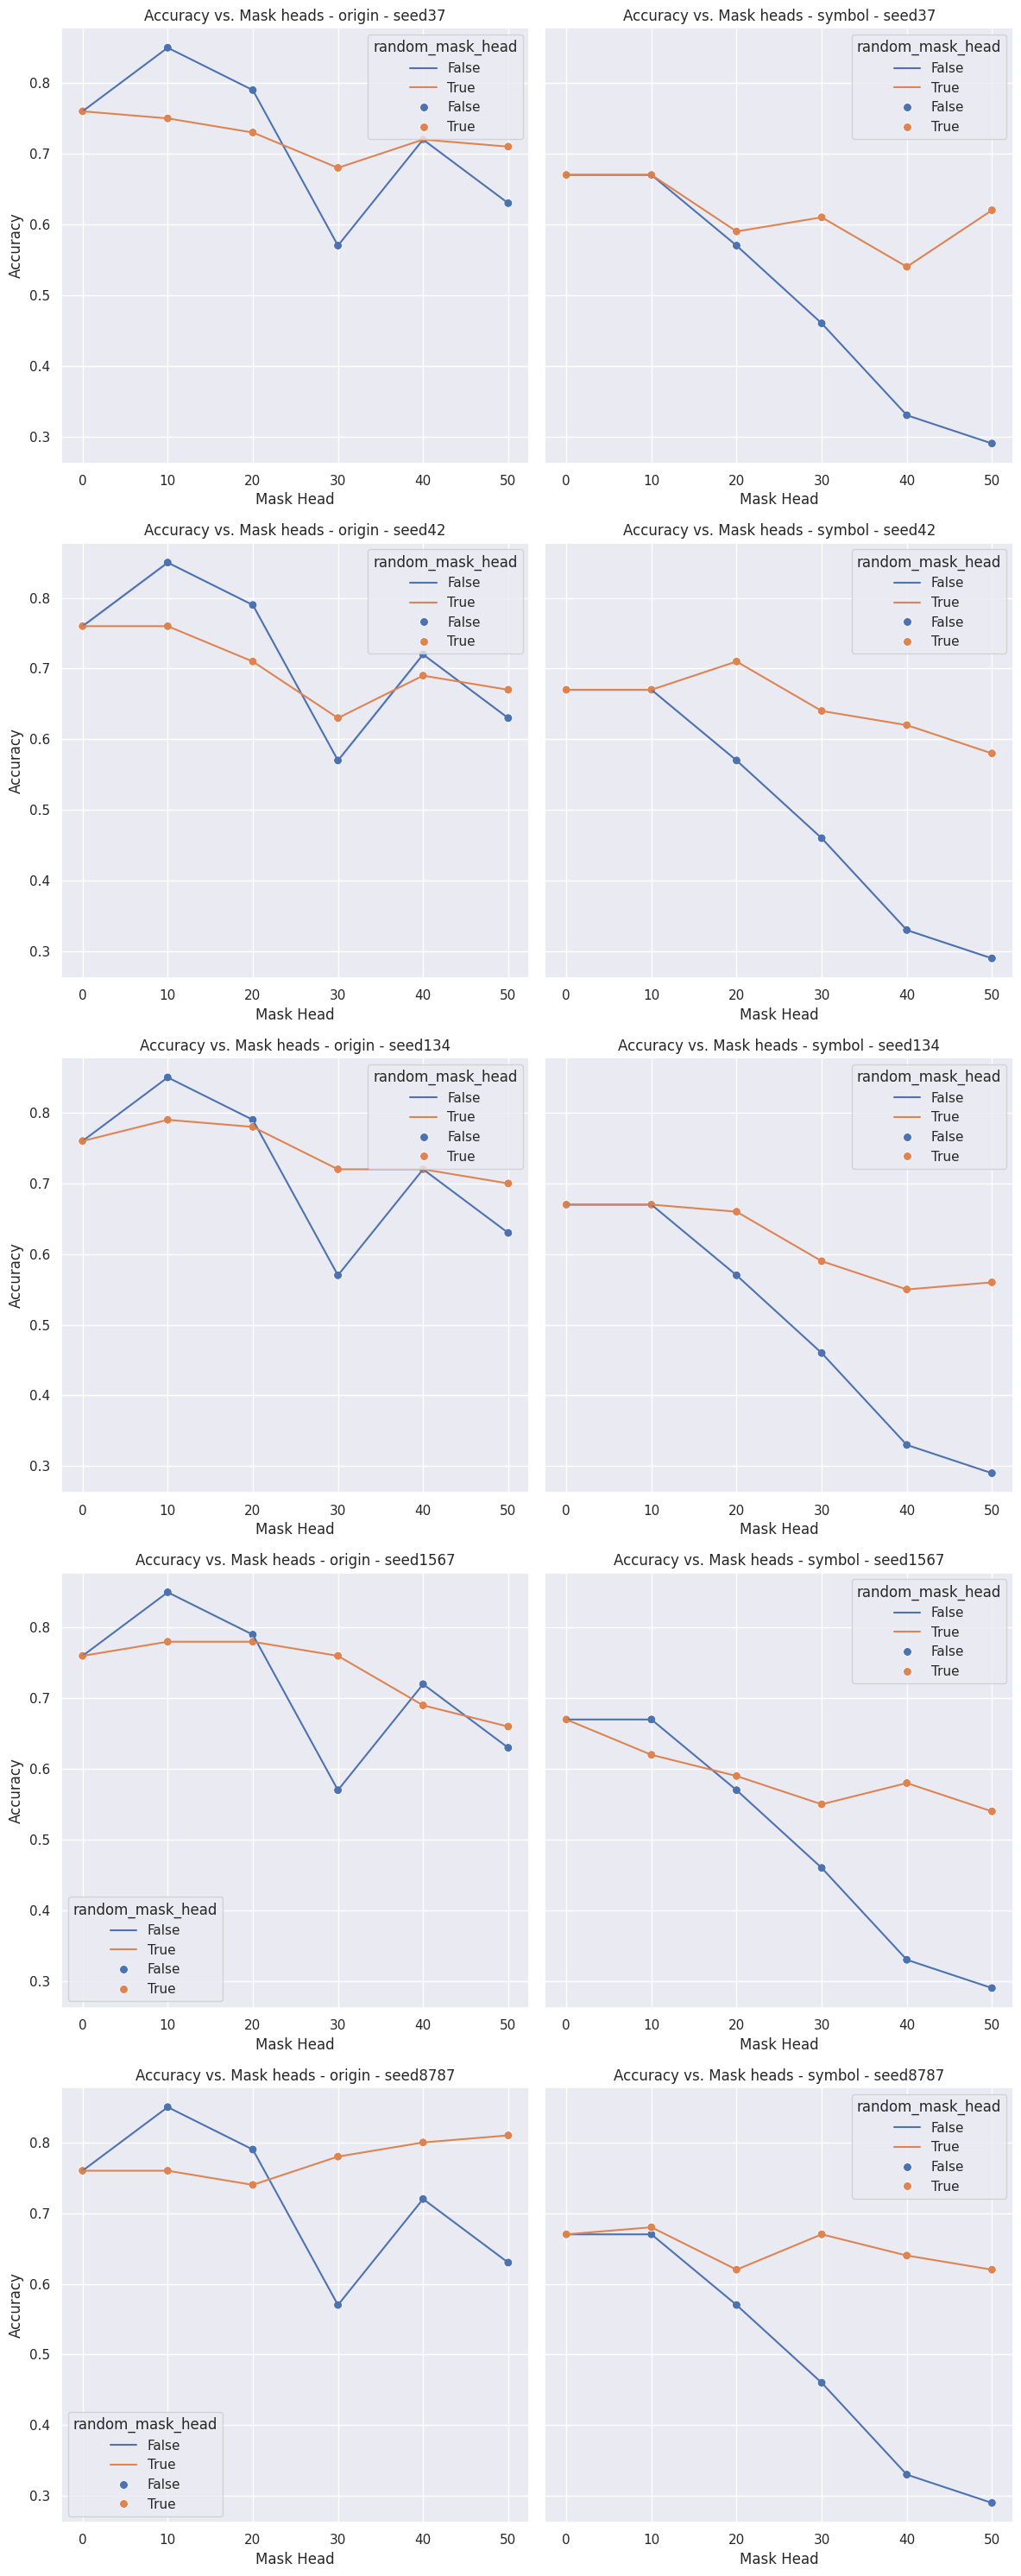

In [7]:
read_plot_data("llama3_8b")


64


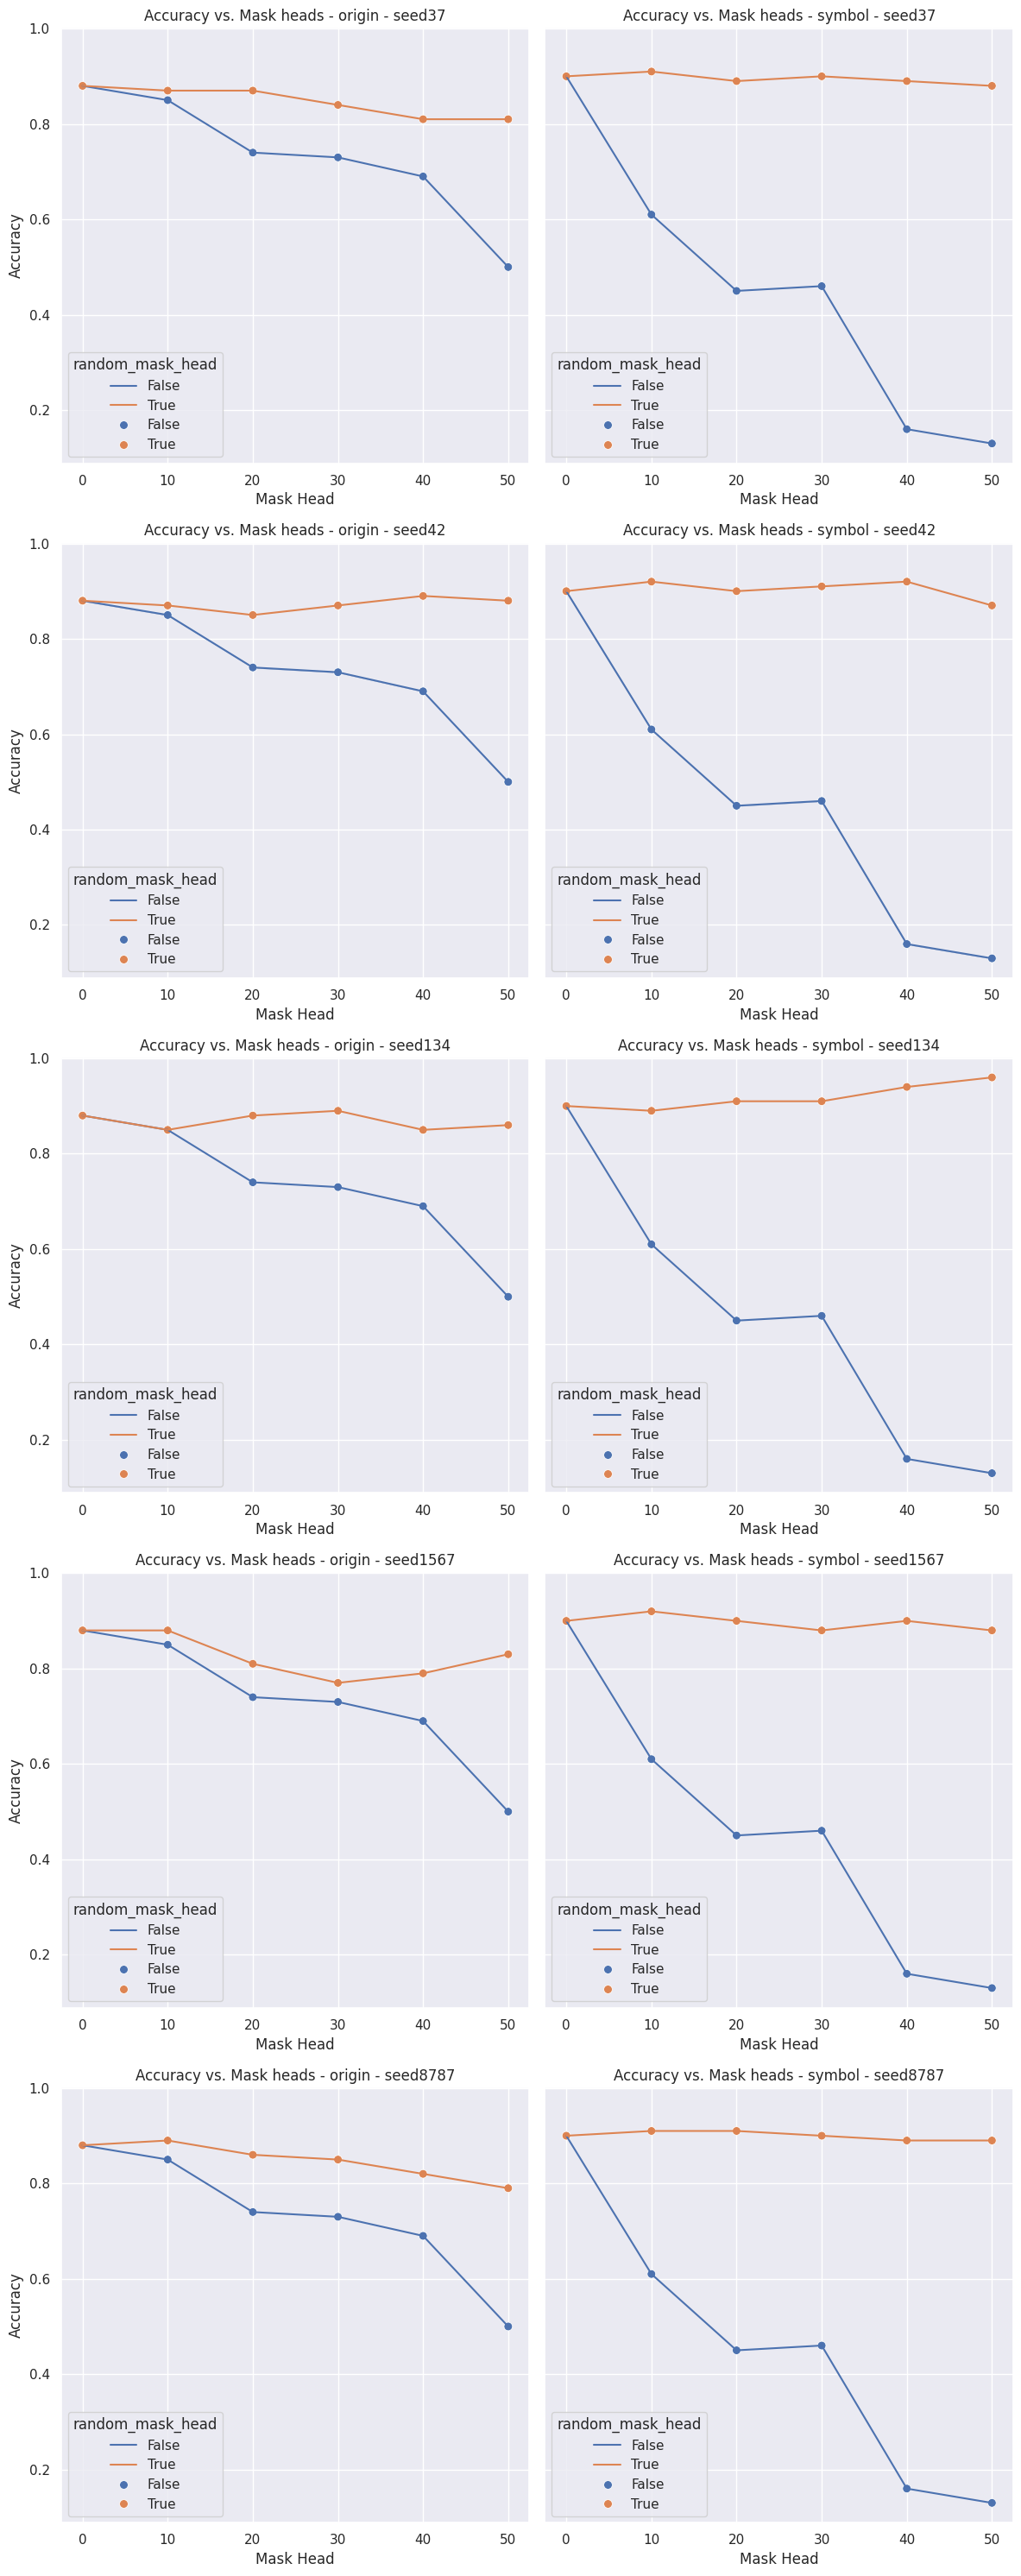

In [8]:
read_plot_data("mistral_7b")

64


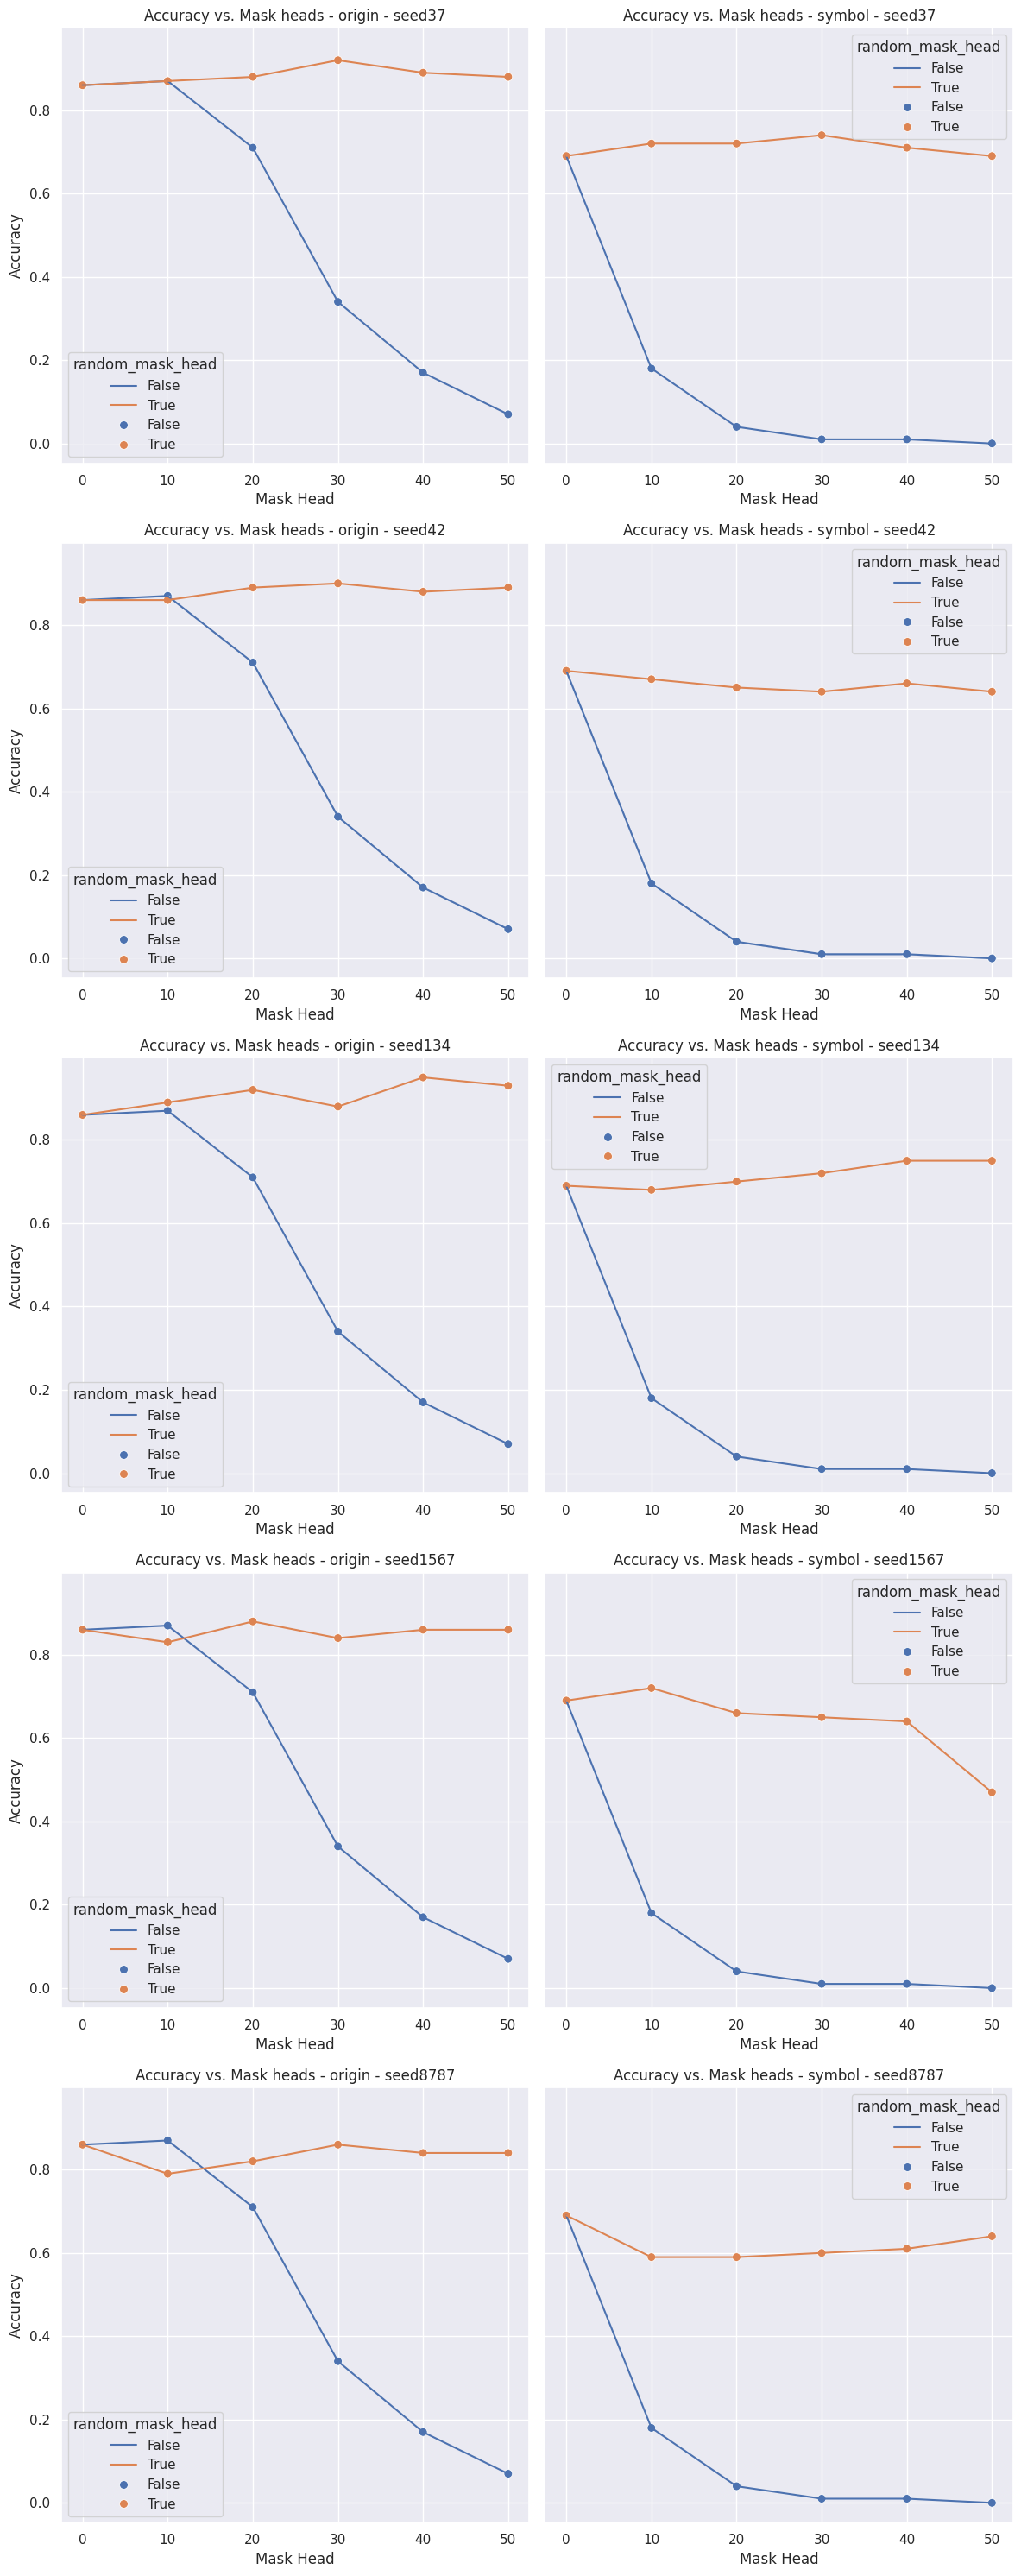

In [9]:
read_plot_data("olmo_7b")

64


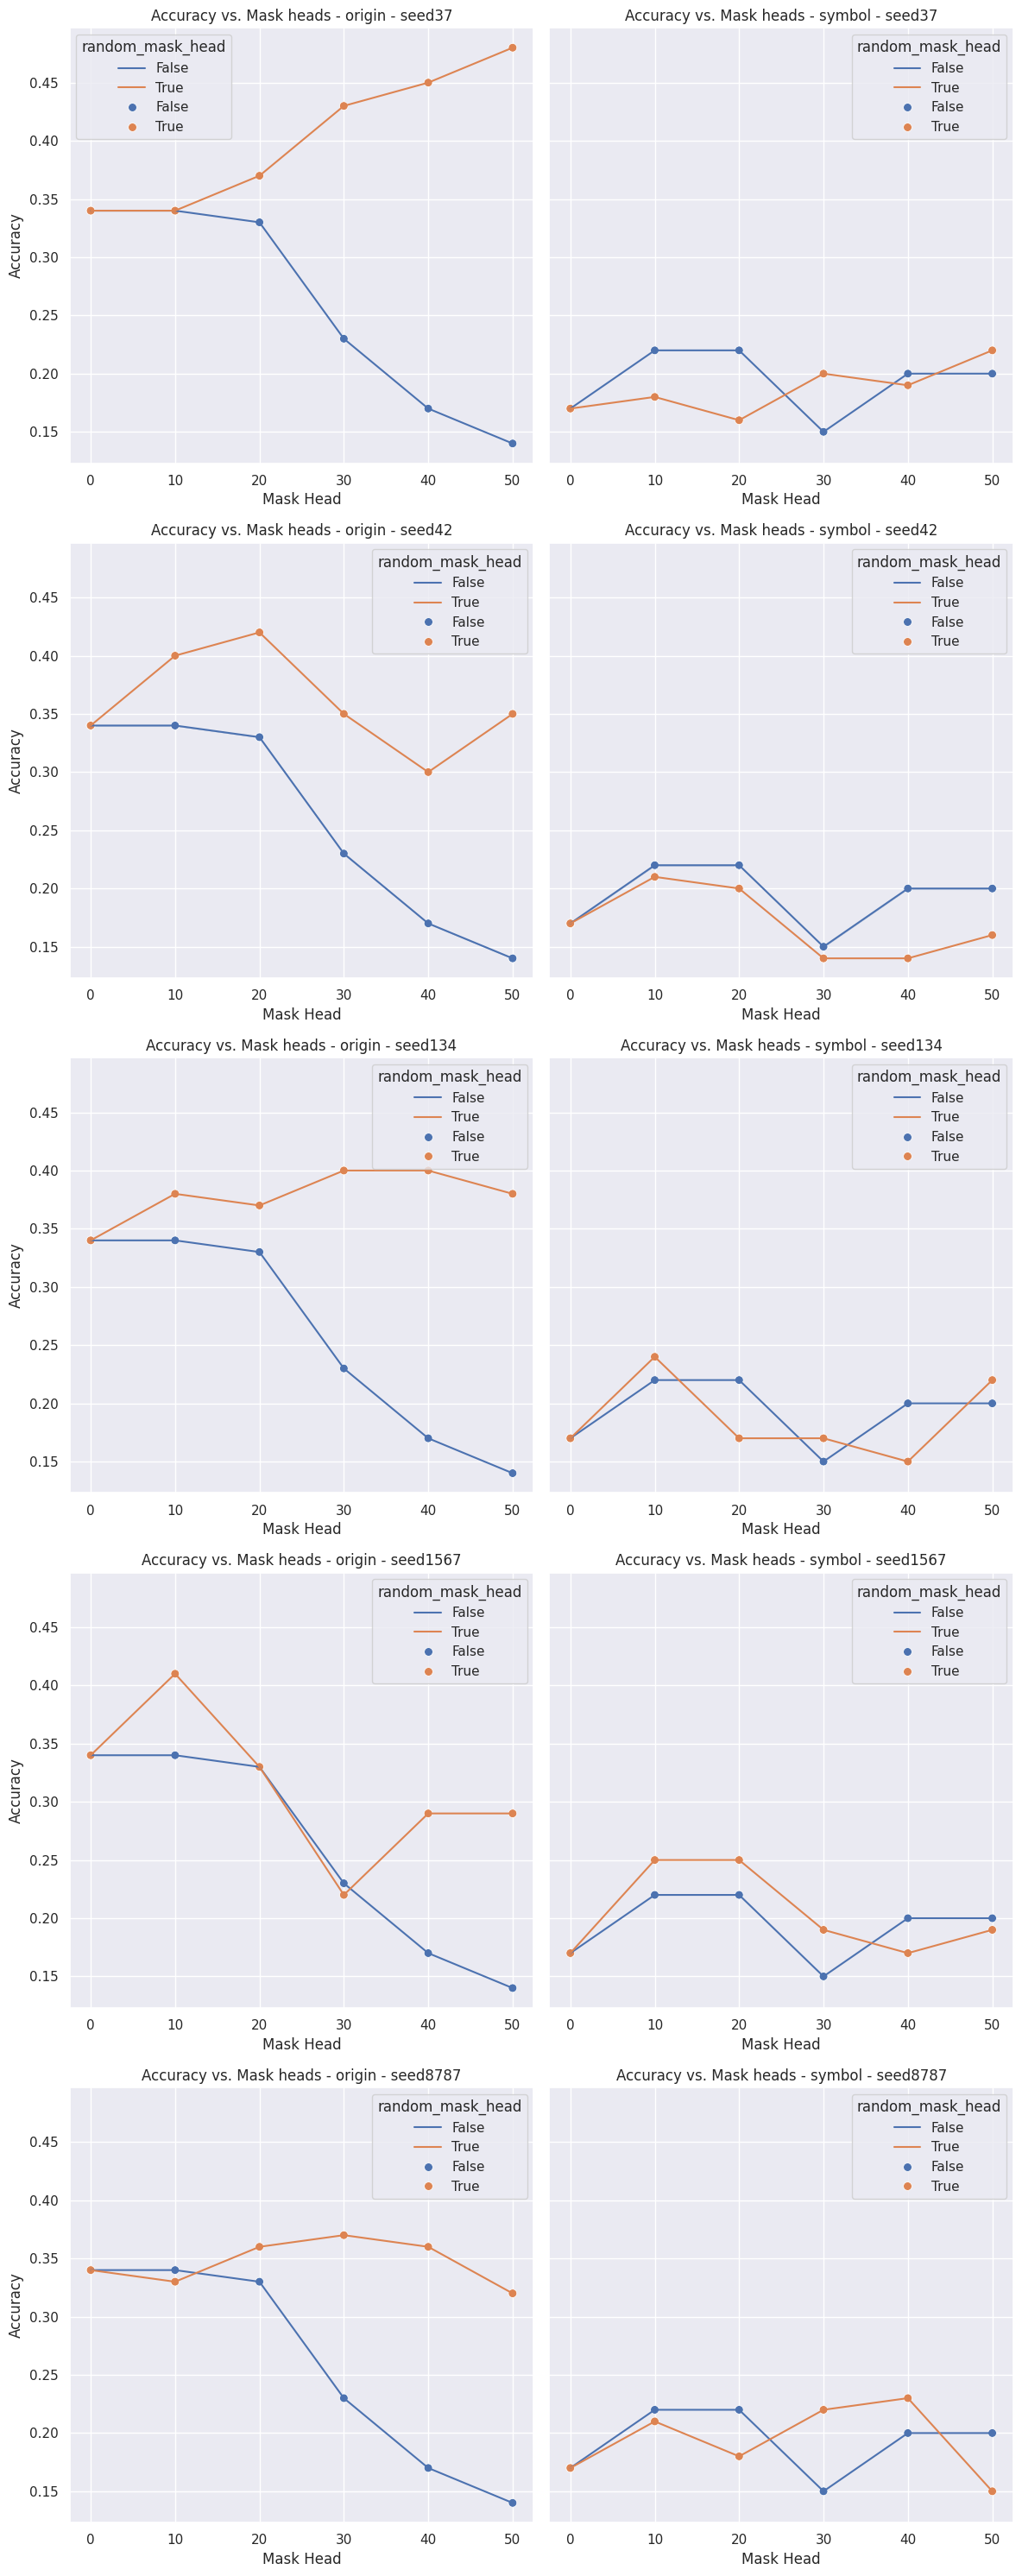

In [10]:
read_plot_data("pythia_7b")